# Exploring eBay Car Sales Data

Knowledge is the best resource for getting the best deal on a used car. Unlike new vehicles, used cars have been on the road and suffered some degrees of wear and tear.

One could be a first-time buyer looking for their first used car or an enthusiast tracking down that best value deal; used car sites simplify the shopping experience with detailed, searchable listings, car reviews, buyers guides, and more. These sites don't just help buyers find cars; they are an excellent resource for evaluating purchase options in terms of potential value for paid money.

We will explore a dataset of used cars from _[eBay Kleinanzeigen](https://www.ebay-kleinanzeigen.de)_, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website. We aim to glean some insights into the nature and popularity of listed cars, then understand which cars promise the most value for price-conscious buyers.

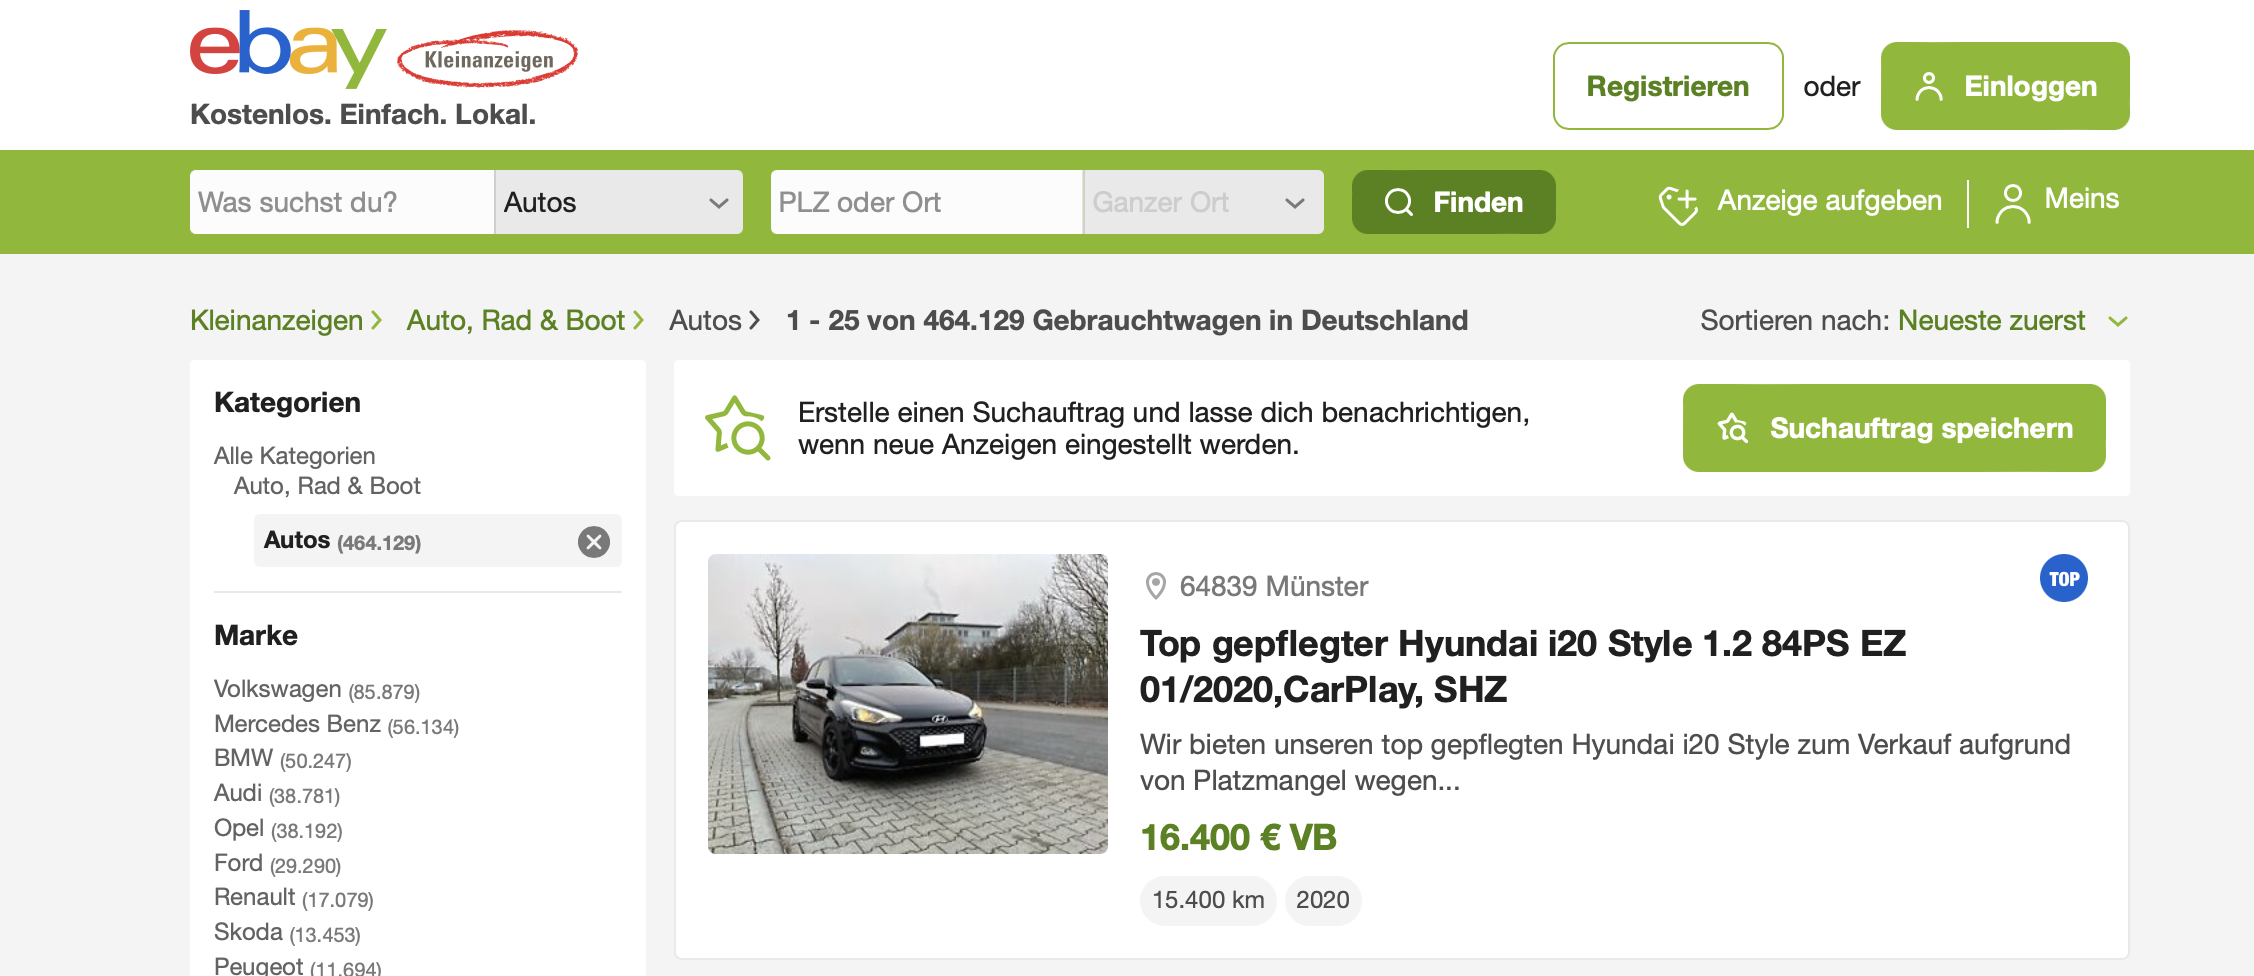

## Summary of Findings

It is effortless to believe that as mileage increases, so does a car's wear and tear. From ebay Kleinanzeigen's listings, we observed that these two may not always correlate. Even a vehicle with low mileage can sustain more than its fair share of wear and tear, negatively impacting the value. Hence, it is essential to devise a metric that combines price, unrepaired damage, and mileage to determine a prospective purchase's overall value.


## Dataset Overview

The original dataset was cleaned to make the data easier to work with. However, our version has been intentionally *dirtied*, with a sample of 50,000 data points from the original *(credits to [DataQuest](https://www.dataquest.io))*. If you need to refer to the original dataset, you can find it [here](https://data.world/data-society/used-cars-data). 


## Data Dictionary

Here is an overview of the 20 columns in the dataset:

- `dateCrawled`:- When this ad was first crawled. All field-values are taken from this date.
- `name`:- Name of the car.
- `seller`:- Whether the seller is private or a dealer.
- `offerType`:- The type of listing
- `price`:- The price on the ad to sell the car.
- `abtest`:- Whether the listing is included in an A/B test.
- `vehicleType`:- The vehicle Type.
- `yearOfRegistration` - The year in which the car was first registered.
- `gearbox`:- The transmission type.
- `powerPS`:- The power of the car in PS.
- `model`:- The car model name.
- `kilometer`:- How many kilometers the car has driven.
- `monthOfRegistration`:- The month in which the car was first registered.
- `fuelType`:- What type of fuel the car uses.
- `brand`:- The brand of the car.
- `notRepairedDamage`:- If the car has a damage which is not yet repaired.
- `dateCreated`:- The date on which the eBay listing was created.
- `nrOfPictures`:- The number of pictures in the ad.
- `postalCode`:- The postal code for the location of the vehicle.
- `lastSeenOnline`:- When the crawler saw this ad last online.

Since our dataset version is dirty, we will perform some cleaning before analysis.

## Importing Libraries

Let's start by importing the libraries we need. We will import the `Numpy` library to perform quick, vectorized operations on our data, the `Pandas` library to extend the functionalities of Numpy even further, the `tabulate library` to _pretty-print_ dataframes and series objects, then some `Plotly` libraries to help us build informing visuals.

In [1]:
# Ignore future warnings from pandas
import warnings
warnings.filterwarnings('ignore')

#import useful libraries
from tabulate import tabulate
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Basic Data Exploration

Next, we will read our dataset into a Pandas dataframe and then explore it further to identify where cleaning is required.

In [2]:
# Import dataset
autos = pd.read_csv('autos.csv', encoding='Latin-1') 

# Explore dataset
autos.info()
autos.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


#### Observations

- *Our Dataset contains **20 columns** and **50,000 rows**. Most of the columns contain object or string data, a few columns contain integers.*
- *The price and odometer columns contain numeric values stored as text.* 
- *We have 5 columns with null values (vehicleType, gearbox, model, fuelType and notRepairedDamage), although these null values are less than 10% in each column.*
- *Columns with date information such as dateCrawled, dateCreated and lastSeen are saved as object/string data instead of dates.*
- *6 columns have string data recorded in German language. These columns are - seller, offerType, vehicleType`, `gear_box, fuelType and notRepairedDamage.*
- *Rather than Python's preferred snakecase, the column names follow camelcase convention.*

As we explore further, we will try to correct these occurrences, so they don't cause us problems later.

## Data Cleaning

## 1. Cleaning Column Names

We will start by converting the column names from camelcase to snakecase. Let's print these columns to identify the ones we need to rename.

In [3]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Next, we will use the snakecase convention while assigning descriptive names to these columns:

In [4]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
               'vehicle_type', 'registration_year', 'gear_box', 'powerPS', 'model',
               'odometer', 'registration_month', 'fuel_type', 'brand',
               'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
               'last_seen']
autos.head(3)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


Let's explore further to determine what other cleaning tasks need to be done. We will try to identify:

- Text columns where all or almost all values are the same. We can often drop these as they don't have helpful information for analysis.

- Data that is not stored in the best format for analysis. They may need to be cleaned, converted or both.

We will use the `DataFrame.describe(include='all')` method to get information for categorical and numeric columns, then use the `Series.value_counts()` and `Series.head()` methods to glean more insights if any columns need examining.

In [5]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


#### Observations

- *The columns seller, offer_type, ab_test, gear_box, and unrepaired_damage seem to have only 2 unique values.*
- *num_pictures contains 50,000 non null values, but has a mean of 0. That seems unusual!*

Let's deal with the columns having 2 unique values:

In [6]:
# loop through each column and print the frequency of each unique value

for item in ['seller', 'offer_type', 'ab_test', 'gear_box', 'unrepaired_damage']:
    print('-'*30)
    print(autos[item].value_counts())
    print('-'*30)

------------------------------
privat        49999
gewerblich        1
Name: seller, dtype: int64
------------------------------
------------------------------
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64
------------------------------
------------------------------
test       25756
control    24244
Name: ab_test, dtype: int64
------------------------------
------------------------------
manuell      36993
automatik    10327
Name: gear_box, dtype: int64
------------------------------
------------------------------
nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64
------------------------------


#### Observations

- ***The Seller and offer_type columns are heavily one-sided:***

    - *In the seller column, Privat means 'private' and gewerblick means 'commercial'. This tells us that most records in the dataset were from private sellers.*
    - *In the offer_type column, Angebot stands for 'offer', while gesuch stands for 'request'. This tells us that majority of the records are car offered for sale.*

These columns are far too one-sided to add helpful information to our analysis. We will drop them, but first, let's explore the `num_pictures` column.

In [7]:
autos['num_pictures'].value_counts()

0    50000
Name: num_pictures, dtype: int64

All the data in `num_pictures` is 0: it appears that none of the listings contain any pictures. We will drop this column along with `seller` and `offer_type`.

In [8]:
print(autos.shape)
autos = autos.drop(['seller', 'offer_type', 'num_pictures'], axis=1)
print(autos.shape)

(50000, 20)
(50000, 17)


## 2. Translating Non-English Words

In the previous observation, we manually interpreted the meaning of the terms in the `seller` and `offer_type` columns. Repeating this process for all affected columns will be cumbersome in the long run. 

In total, there were six columns recorded in German. However, we had already dropped two of the affected columns. We will explore the remaining four in detail:

In [9]:
german_columns = ['vehicle_type', 'gear_box','fuel_type', 'unrepaired_damage']

# print the unique german words in each column of interest
for column in german_columns:
    print('')
    print(autos[column].unique())


['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']

['manuell' 'automatik' nan]

['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']

['nein' nan 'ja']


We can use this information to build a dictionary of translations for each German word. Then, use a function `convert_language()` to iterate through each of the affected columns, while mapping the right English words from our dictionary. The `series.map()` method will handle the translation/mapping process for us:

In [10]:
# translator function
def translate_column(df,column,value_dict):
    '''translates values in df column using value_dict as reference'''
    df[column] = df[column].map(value_dict)


# A dictionary of translations
translations ={# vehicle type terms
               'bus':'bus',
               'limousine':'limousine',
               'kleinwagen': 'small car',
               'kombi': 'combo',
               'coupe':'coupe',
               'suv':'suv',
               'cabrio': 'cabrio',
               'andere': 'other',
               'cabrio': 'convertible',
               # gear box terms
               'manuell': 'manual',
               'automatik': 'automatic',
               # fuel type terms
               'lpg':'lpg',
               'benzin': 'gasoline',
               'diesel':'diesel',
               'cng':'natural gas',
               'hybrid':'hybrid',
               'elektro':'electric',
               'andere':'other',
               # unrepaired damage terms
               'nein':'no',
               'ja':'yes'       
}

Let's translate each of these columns. We will also print out the value counts before and after translation to ensure that the process ran adequately, without compromising our data:

In [11]:
for item in german_columns:
    print('BEFORE TRANSLATING', '\n')
    
    print(autos[item].value_counts(dropna=False))
    
    print('\n', 'TRANSLATING WORDS...')
    print('-'*30)
    
    translate_column(autos, item, translations)
    print(autos[item].value_counts(dropna=False))
    
    print('-'*30)
    print('-'*30)

BEFORE TRANSLATING 

limousine     12859
kleinwagen    10822
kombi          9127
NaN            5095
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64

 TRANSLATING WORDS...
------------------------------
limousine      12859
small car      10822
combo           9127
NaN             5095
bus             4093
convertible     3061
coupe           2537
suv             1986
other            420
Name: vehicle_type, dtype: int64
------------------------------
------------------------------
BEFORE TRANSLATING 

manuell      36993
automatik    10327
NaN           2680
Name: gear_box, dtype: int64

 TRANSLATING WORDS...
------------------------------
manual       36993
automatic    10327
NaN           2680
Name: gear_box, dtype: int64
------------------------------
------------------------------
BEFORE TRANSLATING 

benzin     30107
diesel     14567
NaN         4482
lpg          691
cng           75
hybrid       

#### Observations
- *The German words have been converted to English, and the value counts remained the same after translation. We can conclude that the translation was executed correctly without compromising our data.*

## 3. Reformating Numeric Data

We previously identified some object types that should have been saved as numeric; like the `price` and `odometer` columns. For each of these columns, we will remove the non-numeric characters, convert the values to numeric, then use the `DataFrame.rename()` method to assign descriptive names.

The `price` columns contains non-numeric characters like `','` and `'$'` non-numeric characters, while the The `odometer` column has `','` and `'km'` as its non-numeric characters.

In [12]:
autos['price'] = (autos['price']
                      .str.replace(',', '')
                      .str.replace('$','')
                      .astype(int)
                 )

autos.rename({'price':'usd_price'}, inplace=True, axis=1)
autos['usd_price'].head(5)

0    5000
1    8500
2    8990
3    4350
4    1350
Name: usd_price, dtype: int64

In [13]:
autos['odometer'] = (autos['odometer']
                         .str.replace('km', '')
                         .str.replace(',','')
                         .astype(int)
                    )

autos.rename({'odometer':'odometer_km'}, inplace=True, axis=1)
autos['odometer_km'].head(5)

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

## 4. Detecting Numeric Outliers

Let's continue by exploring the data for outliers. Specifically, we are looking for data that doesn't look right, especially in our numeric columns (`odometer_km` and `usd_price`). We will analyze these columns using the five number summary (min, Q1, median, Q2, Max) then look for any values that look unrealistically high or low.

In [14]:
autos[['odometer_km', 'usd_price']].describe()

,odometer_km,usd_price
count,50000.000000,5.000000e+04
mean,125732.700000,9.840044e+03
std,40042.211706,4.811044e+05
min,5000.000000,0.000000e+00
25%,125000.000000,1.100000e+03
50%,150000.000000,2.950000e+03
75%,150000.000000,7.200000e+03
max,150000.000000,1.000000e+08


#### Observations

- ***Odometer readings***
    - *The median and 75th percentile value are the same as the maximum value (150,000km). The 25th percentile is set at around 125,000km.*
    - *This indicates that a reading of 150,000km is not an outlier, since 75% of the listed cars are between 125,000 to 150,000km in mileage.*

- ***Price***
    - *The maximum price is 100,000,000USD. This varies significantly from the median and 75th percentile values of 2,950 and 7,200USD respectively. The standard deviation is also considerably high (about 480,000 USD).*
    - *The minimum price of 0 is unusual and could affect our analysis.* 

We can further explore `odometer_km` by displaying its sorted value counts:

In [15]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

#### Additional Observations

- *The least mileage observed is 5000km rather than 0km. This is expected because the cars listed on this platform are used cars.*
- *Higher Mileage cars (above 50,000km) are more common on the listing than lower mileage ones.*
- *Over 30,000 (~65%) cars have odometer readings of 150,000. This could imply that there is an upper mileage limit of 150,000km for cars accepted for listing.*

Next, we will explore `usd_price` and attempt to remove its outliers:

In [16]:
autos['usd_price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: usd_price, dtype: float64

## 5. Removing Price Outliers

As observed earlier, the `25th`, `50th` and `75th` percentile of the prices are `1,100`, `2,950` and `7,200`USD. We will use a selection method to create a **“data fence”** from our 25th to 75th percentiles. Any data beyond this fence will be considered an outlier.

We already have enough information to calculate our interquartile range `IQR`. We will use the equation below to determine our upper and lower price fences:

```
    Interquartile Range (IQR) = 75th Percentile - 25th Percentile
    Lower fence = 25th Percentile - 1.5*(IQR)
    Upper fence = 75th Percentile + 1.5*(IQR)
    
```
Lets define all these boundaries in the code cell below:

In [17]:
price_25, price_75 = (1100, 7200)

IQR = price_75 - price_25
lower_fence = price_25 - (1.5*IQR)
upper_fence = price_75 + (1.5*IQR)

print('Interquartile Range: ', IQR)
print('Lower fence: ', lower_fence)
print('Upper fence: ', upper_fence)

Interquartile Range:  6100
Lower fence:  -8050.0
Upper fence:  16350.0


Fences may extend beyond the data sometimes, so it is totally fine if our lower fence is negative. We should be mindful, however, that a minimum price value of `0` can also affect our analysis. In this case, it is advisable to eliminate the entries with zero prices too.

Before we proceed, let's take a look at how many listings are recorded at zero price:

In [18]:
autos['usd_price'].value_counts().head()

0       1421
500      781
1500     734
2500     643
1000     639
Name: usd_price, dtype: int64

Of the 50,000 rows in our dataset, 1,421 records `(3%)` are listed at zero price. Since this percentage is very low, we can safely remove these entries. We will set our lower fence at `1` to exclude zero prices:

In [19]:
autos = autos[autos['usd_price'].between(1, upper_fence)]

autos['usd_price'].describe()

count    44795.000000
mean      4089.433620
std       3841.429247
min          1.000000
25%       1150.000000
50%       2700.000000
75%       5999.000000
max      16350.000000
Name: usd_price, dtype: float64

#### Observations

- *Our dataset has been reduced to 44,795 rows in total. The 25th, 50th and 75th percentiles are close to their initial values before cleaning.*
- *The standard deviation (3,841USD) is considerably lower than the value of 480,000USD recorded before.*
- *16,350USD is a better approximation for the maximum price than the previous value of 100,000,000USD, considering that our 75th percentile is around 6,000USD.*

Let's now explore the date columns to understand the date range our data covers

## Exploring the Date Columns

There are 5 columns in our dataset that should represent date values. Some of these columns were created by the crawler, while some were obtained from the website. We can differentiate by referring to the information below:

```
- `date_crawled` - added by the crawler
- `last_seen` -  added by the crawler
- `ad_created` - obtained from the website
- `registration_month` - obtained from the website
- `registration_year`- obtained from the website

```

`date_crawled`, `last_seen`, and `ad_created` are currently identified as object types. To understand them quantitatively, we need to convert them to `datetime` objects.

`registration_month` and `registration_year` are represented as numeric values. Using the `.describe()` method, we can understand their distribution, without any conversion.

Let's first understand how the values in the three string columns are formatted.

In [20]:
autos[['date_crawled', 'ad_created', 'last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


#### Observations

- *It appears that the first 10 characters in each column represent the date in the yy-mm-dd format (e.g. 2016-03-12). The other characters represent hours:minutes:seconds*

To understand the distribution of the dates, we can extract just the relevant values using a string method. We can use `Series.str[:10]` to select the first 10 characters in each column.

### 1. Date Crawled

34
+------------+-------------+
| Date       |   % crawled |
|------------+-------------|
| 2016-03-05 |       0.025 |
| 2016-03-06 |       0.014 |
| 2016-03-07 |       0.036 |
| 2016-03-08 |       0.034 |
| 2016-03-09 |       0.033 |
| 2016-03-10 |       0.033 |
| 2016-03-11 |       0.032 |
| 2016-03-12 |       0.037 |
| 2016-03-13 |       0.016 |
| 2016-03-14 |       0.037 |
| 2016-03-15 |       0.034 |
| 2016-03-16 |       0.03  |
| 2016-03-17 |       0.032 |
| 2016-03-18 |       0.013 |
| 2016-03-19 |       0.034 |
| 2016-03-20 |       0.038 |
| 2016-03-21 |       0.037 |
| 2016-03-22 |       0.033 |
| 2016-03-23 |       0.032 |
| 2016-03-24 |       0.029 |
| 2016-03-25 |       0.032 |
| 2016-03-26 |       0.032 |
| 2016-03-27 |       0.03  |
| 2016-03-28 |       0.035 |
| 2016-03-29 |       0.034 |
| 2016-03-30 |       0.034 |
| 2016-03-31 |       0.032 |
| 2016-04-01 |       0.033 |
| 2016-04-02 |       0.035 |
| 2016-04-03 |       0.039 |
| 2016-04-04 |       0.036 |
| 2016-04-0

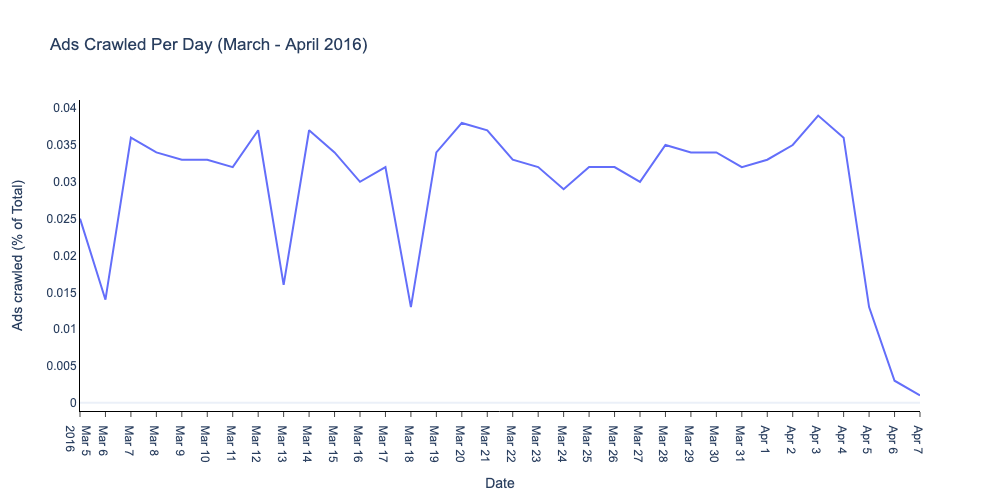

In [64]:
print(autos['date_crawled'].str[:10].unique().size) #counts the unique crawl dates

date_crawled = (autos['date_crawled']
                     .str[:10]
                     .value_counts(normalize=True, dropna=False)
                     .round(3)
                     .sort_index()
                )

# use tabulate to print a pretty table
print(tabulate(date_crawled.to_frame(),headers=['Date','% crawled'], tablefmt='psql'))

# visualize data
fig = px.line(x=date_crawled.index, y=date_crawled.values, template='plotly_white', 
              title='Ads Crawled Per Day (March - April 2016)')

fig.update_xaxes(nticks=34, title='Date',showgrid=False, ticks='outside', linecolor='black')
fig.update_yaxes(title='Ads crawled (% of Total)',showgrid=False, linecolor='black')
fig.update_layout(font_size = 12, font_family='Arial')
fig.show('png', width=1000)

#### Observations
- *It appears the crawler collected information from the site everyday between March 5, 2016 and April 7, 2016, a period of 34 days.*
- *Some occassional drops can be observed on some weekend days in March (6th, 13th, 18th); and the last 3 days in April. However, the number of ads crawled seem evenly distributed overall.*

### 2. Ad Created

Earliest Date 2015-08-10    0.000022
Name: ad_created, dtype: float64

Last Date 2016-04-07    0.001183
Name: ad_created, dtype: float64


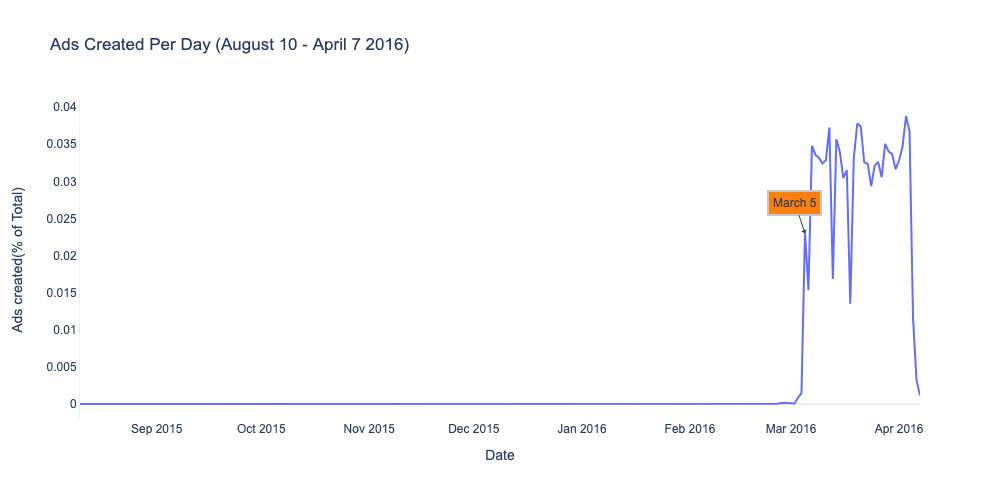

In [22]:
ad_created = (autos['ad_created']
                 .str[:10]
                 .value_counts(normalize=True, dropna=False)
                 .sort_index()
             )

# Examine the earliest and last ad created dates.
print('Earliest Date', ad_created.head(1))
print('')
print('Last Date', ad_created.tail(1))

# visualize data
fig = px.line(x=ad_created.index, y=ad_created.values, template='plotly_white', 
              title='Ads Created Per Day (August 10 - April 7 2016)')

fig.update_xaxes(title='Date',showgrid=False)
fig.update_yaxes(title='Ads created(% of Total)',showgrid=False, showline=True)

# Label the date where the most notable ad increase occured.
fig.add_annotation(x='2016-03-05',y=0.02302195, text= 'March 5',showarrow=True, arrowhead=1,
                   bordercolor="#c7c7c7", borderwidth=2,borderpad=4, bgcolor="#ff7f0e")

fig.update_layout(font_size = 12, font_family='Arial')
fig.show('png', width=1000)

#### Observations

- *It appears that we are dealing with listings created between August 10, 2015, and April 7, 2016.* 
- *Earlier, there were **very few** listings on the site. This pattern changed, especially on March 5, 2016, when we noticed a massive growth in listings.  The number of listings has remained higher since then.*
- *Interestingly, March 5, 2016, was also the exact date when the crawler crawled the first group of ads from the website.*

### 3. Last Seen

+------------+--------------+
| Date       |   last_seen% |
|------------+--------------|
| 2016-03-05 |        0.001 |
| 2016-03-06 |        0.005 |
| 2016-03-07 |        0.006 |
| 2016-03-08 |        0.008 |
| 2016-03-09 |        0.01  |
| 2016-03-10 |        0.011 |
| 2016-03-11 |        0.013 |
| 2016-03-12 |        0.025 |
| 2016-03-13 |        0.009 |
| 2016-03-14 |        0.013 |
| 2016-03-15 |        0.016 |
| 2016-03-16 |        0.017 |
| 2016-03-17 |        0.029 |
| 2016-03-18 |        0.008 |
| 2016-03-19 |        0.016 |
| 2016-03-20 |        0.021 |
| 2016-03-21 |        0.021 |
| 2016-03-22 |        0.022 |
| 2016-03-23 |        0.019 |
| 2016-03-24 |        0.02  |
| 2016-03-25 |        0.02  |
| 2016-03-26 |        0.017 |
| 2016-03-27 |        0.016 |
| 2016-03-28 |        0.022 |
| 2016-03-29 |        0.023 |
| 2016-03-30 |        0.025 |
| 2016-03-31 |        0.024 |
| 2016-04-01 |        0.023 |
| 2016-04-02 |        0.025 |
| 2016-04-03 |        0.026 |
| 2016-04-

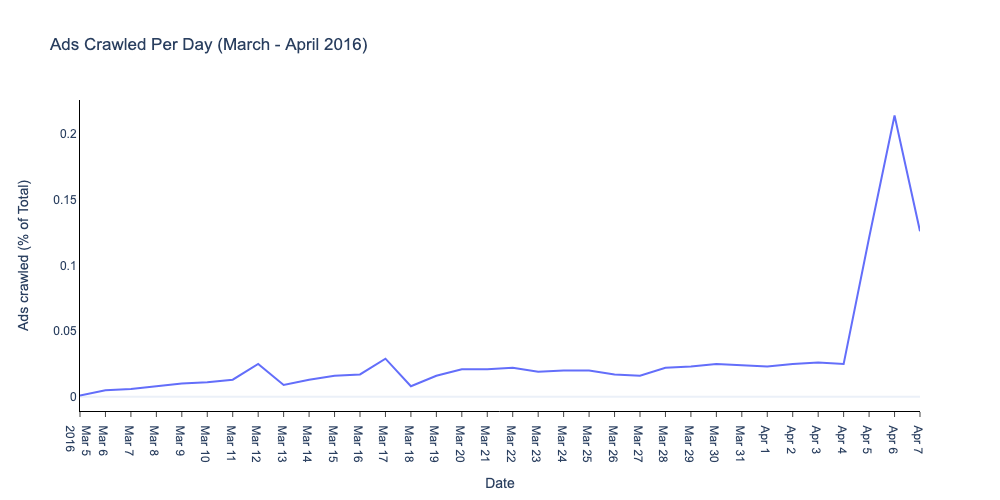

In [23]:
last_seen = (autos['last_seen']
                 .str[:10]
                 .value_counts(normalize=True, dropna=False)
                 .round(3)
                 .sort_index()
            )

# pretty print date with tabulate
print(tabulate(last_seen.to_frame(),headers=['Date','last_seen%'], tablefmt='psql'))

# visualise data
fig = px.line(x=last_seen.index, y=last_seen.values, template='plotly_white', 
              title='Ads Crawled Per Day (March - April 2016)')
fig.update_xaxes(nticks=34, title='Date',showgrid=False, ticks='outside', linecolor='black')
fig.update_yaxes(title='Ads crawled (% of Total)',showgrid=False, linecolor='black')
fig.update_layout(font_size = 12, font_family='Arial')
fig.show('png', width=1000)

#### Observations

- *Since we know that the crawler also added the last seen information, it makes sense that the last seen column shows the same 34-day time period as the date crawled (March 5, 2016 and April 7, 2016).*
- *The number of last seen ads were relatively uniform throughout the crawling period. However, it appears that the crawler noticed an increase in ad disappearances in the final few days (April 5 - April 7, 2016).*
- *This may give bits of insight into the crawlers activity. We can assume the crawlers daily routine: The crawler visits the site, collects information on different ads, then records the date crawled and last seen information for various ads.*

### 4. Registration Year

In [24]:
autos['registration_year'].describe()

count    44795.00000
mean      2003.97339
std         74.81955
min       1000.00000
25%       1999.00000
50%       2003.00000
75%       2007.00000
max       9999.00000
Name: registration_year, dtype: float64

#### Observations

- ***The registration year column contains some unexpected values:***
    - *The minimum value is 1000, this is long before 1885 when cars were invented.*
    - *The maximum value is 9999, many years into the future. We are also aware that the listings were last seen by the crawler in 2016. A car can't be first registered after its listing has been seen.* 

Determining the earliest valid year can be challenging. However since we know that cars were invented in 1885, we can use the first few decades of 1900s as our lower cut off point. At the higher end, any record with registration year above 2016 is definitely inaccurate. 

Before we eliminate these rows, let's count the number of listings with cars that fall outside the 1900 - 2016 registration year and see if it's safe to remove these rows entirely without impacting our analysis too much.

In [25]:
invalid_rows = (~(autos['registration_year'].between(1900, 2016))).sum()
total_rows = autos['registration_year'].shape[0]
percentage_invalid = invalid_rows/total_rows

print('The invalid years constitute {:.1f}% of the total data'.format(percentage_invalid * 100))

The invalid years constitute 4.1% of the total data


Since these years constitute only 4.1% of our total data. We can safely eliminate these records from our analysis:

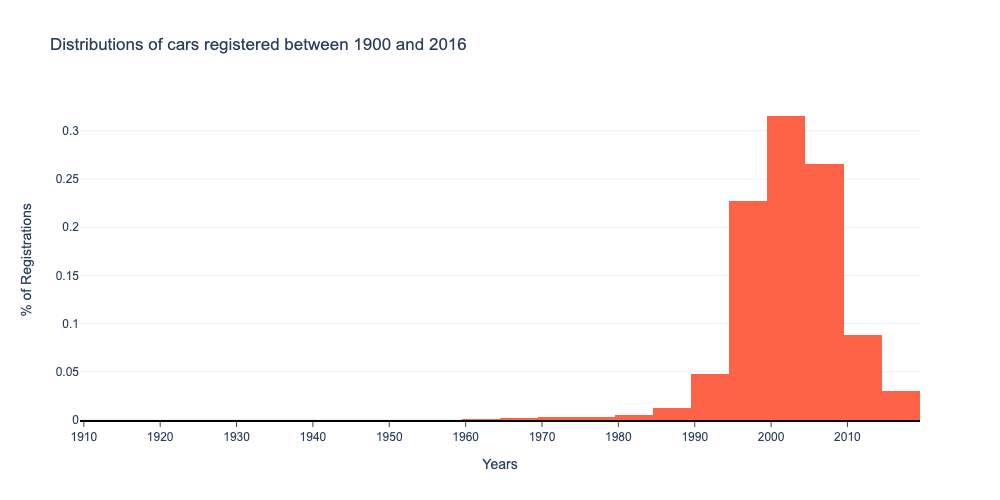

In [26]:
autos = autos[autos['registration_year'].between(1900, 2016)]

years = (autos['registration_year']
         .value_counts(normalize=True)
         .sort_values(ascending=False)
    )

fig = px.histogram(x=years.index, y=years.values, nbins=30,
                   title='Distributions of cars registered between 1900 and 2016',
                   template='plotly_white')

fig.update_traces(marker_color='#ff6347')
fig.update_xaxes(nticks=20,title='Years', showline=True, linewidth=2, linecolor='black', ticks='outside')
fig.update_yaxes(title='% of Registrations')
fig.update_layout(font_size = 12, font_family='Arial')
fig.show('png', width=1000)

#### Observations

- *It appears that most of the vehicles were registered between 1990 and 2010. Only a small proportion of listed cars were registered before 1990.*

### 5. Registration Month

In [27]:
autos['registration_month'].describe()

count    42959.000000
mean         5.791918
std          3.691957
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

#### Observations:

- *Since the lowest value is set at 0 (presumably denoting January), we would expect the highest value to be at 11 (denoting December). However the highest value we see here is 12. This is quite unexpected.*

We will probe into this further:

In [28]:
(autos['registration_month']
     .value_counts(normalize=True)
     .sort_index()
    
)

0     0.092344
1     0.065760
2     0.060500
3     0.103308
4     0.082846
5     0.083405
6     0.087479
7     0.077679
8     0.064527
9     0.068624
10    0.074932
11    0.068111
12    0.070486
Name: registration_month, dtype: float64

#### Observations

- **_This looks a bit more challenging:_**
    - *The months are evenly distributed. Hence it would not be a good idea to remove any month in favor of the others*
    - *No month is erroneously skipped, which further complicates what 0 and 12 are supposed to represent.*

Since it is unclear where the error is from, we will drop the `registration_month` column as it could compromise our analysis:

In [29]:
autos = autos.drop('registration_month', axis=1)
autos.shape

(42959, 16)

## Data Analysis

## Exploring Price by Brand

Lets explore the unique values in the brand column to identify the most common brands in the used car listings:

+----------------+-----------------+
| Brands         |   % of Listings |
|----------------+-----------------|
| volkswagen     |     0.214763    |
| opel           |     0.115203    |
| bmw            |     0.103541    |
| mercedes_benz  |     0.0881305   |
| audi           |     0.0775623   |
| ford           |     0.0730929   |
| renault        |     0.0507693   |
| peugeot        |     0.0321702   |
| fiat           |     0.0277474   |
| seat           |     0.019088    |
| skoda          |     0.0169929   |
| mazda          |     0.0160851   |
| nissan         |     0.0157825   |
| smart          |     0.0153635   |
| citroen        |     0.0150376   |
| toyota         |     0.0133616   |
| hyundai        |     0.0105449   |
| volvo          |     0.00933448  |
| mitsubishi     |     0.00870598  |
| sonstige_autos |     0.00849647  |
| honda          |     0.00833353  |
| mini           |     0.00775158  |
| alfa_romeo     |     0.00700668  |
| kia            |     0.00696012  |
|

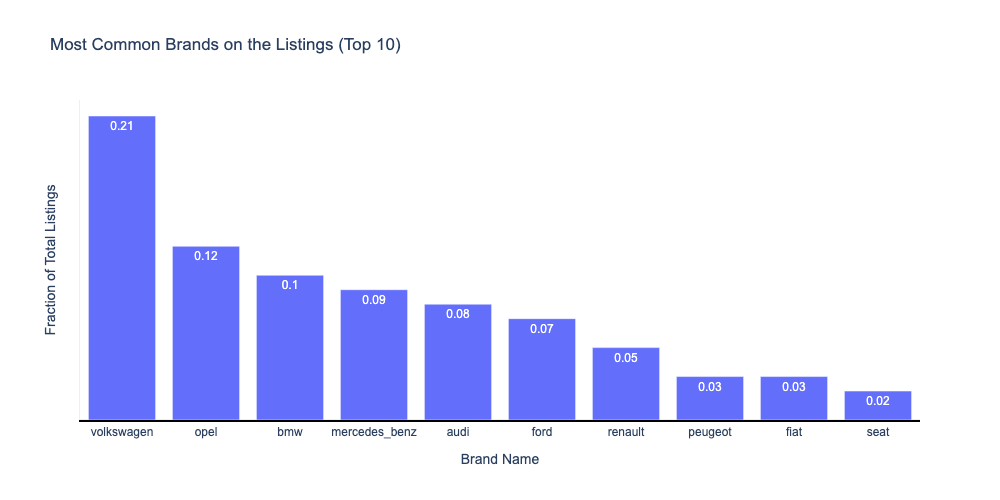

In [30]:
# compute the relative proportions of each brand
brands = autos['brand'].value_counts(normalize=True)

# Extract the top-10 for visualization purposes
top_10 = brands.head(10).round(2)

print(tabulate(brands.to_frame(), headers=['Brands', '% of Listings'], tablefmt='psql'))

fig = px.bar(x=top_10.index, y=top_10.values, text=top_10.values,
             template='plotly_white', title='Most Common Brands on the Listings (Top 10)')

fig.update_xaxes(title='Brand Name', showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title='Fraction of Total Listings',showgrid=False, showline=True, showticklabels=False)
fig.update_layout(font_size = 12, font_family='Arial')
fig.show('png', width=1000)

#### Observations:

- *The most popular brands are Volkswagen (21%). Opel (about 12%), BMW (10%), Mercedes Benz (9%) and Audi (8%). Ford (7%) and Renaut (5%) follow behind respectively.* 
- *If we summed these percentages, we would find out that these top 7 brands constitute about 72% of the total population of listed brands. Other brands constitute a combined 28%.* 
- *The top 5 brands are German (Volkswagen, Opel, BMW, Mercedes and Audi). They constitute about 50% of all car listings*

We will limit our analysis to brands representing more than 5% of the total. Interestingly, only the top 7 brands meet this criterion.

In [31]:
# extract the names of the top 7 brands
top_brands = (autos['brand']
                  .value_counts()
                  .head(7)
                  .index
             )

top_brands

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford',
       'renault'],
      dtype='object')

Next, let's compute and compare the average prices of cars in the top 7 brands:

+---------------+-----------------+
| Brands        |   Average price |
|---------------+-----------------|
| audi          |            5703 |
| bmw           |            5649 |
| mercedes_benz |            5259 |
| volkswagen    |            4183 |
| ford          |            2944 |
| opel          |            2712 |
| renault       |            2281 |
+---------------+-----------------+


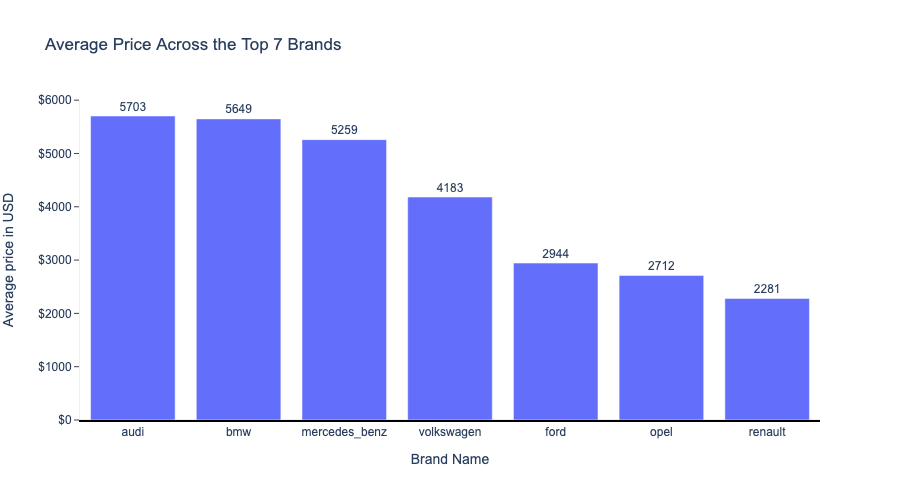

In [32]:
aggregate_price = {}

for brand in top_brands:
    
    prices = autos['usd_price'][autos['brand'] == brand]
    mean_price = prices.mean()
    aggregate_price[brand] = int(mean_price)
    
# convert dictionary to a pandas series for easy printing and manipulation
price_series = pd.Series(aggregate_price) 
price_series = price_series.sort_values(ascending=False)


print(tabulate(price_series.to_frame(), headers=['Brands', 'Average price'], tablefmt='psql'))

fig = px.bar(x=price_series.index, y=price_series.values, text=price_series.values,
             template='plotly_white', title='Average Price Across the Top 7 Brands')

fig.update_xaxes(title='Brand Name', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title='Average price in USD',showgrid=False, showline=True, showticklabels=True,
                ticks='outside', tickprefix='$')
fig.update_layout(font_size = 12, font_family='Arial')
fig.update_traces(textposition='outside')
fig.show('png', width=900)

#### Observations

- *Asides from Opel, the German brands (Volkswagen, BMW, Mercedes and Audi) seem more expensive on average than the American or French ones.*
- *The average price for Volkwagen seems to be at the middle point of all these prices, offering an interesting balance between its popularity and price.*

## The Top 7 Brands - Exploring Mileage

For the top 7 brands, we will use aggregation to understand the average mileage for those cars and if there's any visible link with mean price. Rather than display both aggregated series objects and visually compare them, we will combine the data from both series objects into a single dataframe (with a shared index) and display the dataframe directly.

We have already converted our `aggregate_price` dictionary into the Pandas series object - `price_series` using the `pd.Series()` constructor. Next we will convert the series object into a Dataframe using the `pd.DataFrame()` constructor:

In [33]:
price_df = pd.DataFrame(data = price_series, columns = ['mean_price_usd'])
price_df

,mean_price_usd
audi,5703
bmw,5649
mercedes_benz,5259
volkswagen,4183
ford,2944
opel,2712
renault,2281


Lets repeat the same process for the `odometer_km` column. We will calculate the average mileage of the cars in the top 7 brands, then construct Series and Dataframe objects from our results.

In [34]:
aggregate_mileage = {}

for brand in top_brands:
    
    mileage = autos['odometer_km'][autos['brand'] == brand]
    mean_mileage = mileage.mean()
    aggregate_mileage[brand] = int(mean_mileage)
    
mileage_series = pd.Series(aggregate_mileage)    
mileage_df = pd.DataFrame(data = mileage_series, columns = ['mean_mileage_km'])

mileage_df

,mean_mileage_km
volkswagen,132813
opel,130500
bmw,138833
mercedes_benz,138411
audi,139701
ford,127004
renault,128892


Finally, we will join the average price and mileage dataframes together to enable us compare their results at a glance. One way we can do this is by assigning `mileage_series` to a new column in the price dataframe:

+---------------+------------------+-------------------+
|               |   mean_price_usd |   mean_mileage_km |
|---------------+------------------+-------------------|
| audi          |             5703 |            139701 |
| bmw           |             5649 |            138833 |
| mercedes_benz |             5259 |            138411 |
| volkswagen    |             4183 |            132813 |
| opel          |             2712 |            130500 |
| renault       |             2281 |            128892 |
| ford          |             2944 |            127004 |
+---------------+------------------+-------------------+


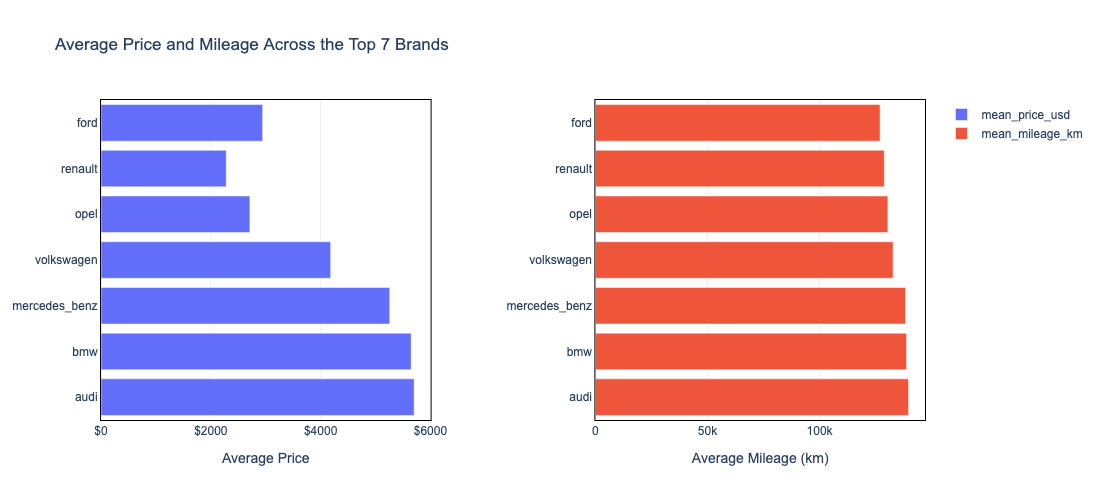

In [66]:
price_df['mean_mileage_km'] = mileage_series
price_df=price_df.sort_values(by='mean_mileage_km', ascending=False)

print(tabulate(price_df, headers='keys', tablefmt='psql'))

# Visualize results
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.2)

fig.add_trace((go.Bar(y=price_df.index, x=price_df['mean_price_usd'], orientation='h',
                      name='mean_price_usd'
                     )
              ), row=1, col=1)

fig.add_trace((go.Bar(y=price_df.index, x=price_df['mean_mileage_km'], orientation='h',
                      name='mean_mileage_km'
                     )
              ), row=1, col=2)

fig.update_layout(template = 'plotly_white', title_text= 'Average Price and Mileage Across the Top 7 Brands',
                 height=500, font_size = 12, font_family='Arial')

fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(tickprefix='$',row=1, col=1, title='Average Price')
fig.update_xaxes(row=1, col=2, title='Average Mileage (km)')
fig.show('png', width=1100)

#### Observations

- *We would expect car prices to fall as mileage increases. However this is not the case here as we notice the more expensive vehicles having higher mileage, and the cheaper ones recording lower mileages.*
- *We see Volkswagen at the median of the mileage values again. Could its popularity on the listings be perhaps attributable to its balance in price and mileage?*

## Popular Brand Model Combinations

We already have information on the most common brands. It would be interesting to know which particular models contribute to the brand's popularity on the listings.

Panda has a handy `.groupby()` method that enables us to group large amounts of data from a dataframe then compute aggregations on these groups. Our action will be a simple two-step process:

- First, we will extract the two columns of interest (`brand` and `model`) from our dataframe.

- Next, we will group the distinct occurrence of each brand and model using the `.groupby` method, then compute aggregations of each model's frequency:

In [36]:
# extract the relevant columns from the autos dataframe
brand_model = autos[['brand','model']]

brand_model_grouped = (brand_model
                           .groupby(['brand','model']) # select distinct occurences of each brand and model
                           ['model'].count() # count the distinct models within each brand
                      )

brand_model_grouped

brand       model   
alfa_romeo  145          4
            147         80
            156         88
            159         32
            andere      55
                        ..
volvo       v40         85
            v50         29
            v60          1
            v70         89
            xc_reihe    33
Name: model, Length: 285, dtype: int64

Our results do not look attractive to read. By default, the `.groupby()` method returns a series with the grouped columns as a multi-index. We will push the grouped columns back into dataframe columns by resetting the indices to obtain easy-to-read results. We can also assign an appropriate name to our aggregate column:

In [37]:
# reset multi-index series to dataframe and assign a name to the aggregate column
brand_model_grouped = brand_model_grouped.reset_index(name='count') 
brand_model_grouped.head(5)

,brand,model,count
0,alfa_romeo,145,4
1,alfa_romeo,147,80
2,alfa_romeo,156,88
3,alfa_romeo,159,32
4,alfa_romeo,andere,55


This already looks much better, but we only need information on the most popular cars. We need to sort the entire dataframe in descending order based on the values in the `counts` column:

+-----+---------------+----------+---------+
|     | brand         | model    |   count |
|-----+---------------+----------+---------|
| 262 | volkswagen    | golf     |    3487 |
|  22 | bmw           | 3er      |    2431 |
| 268 | volkswagen    | polo     |    1604 |
| 179 | opel          | corsa    |    1589 |
| 176 | opel          | astra    |    1339 |
| 266 | volkswagen    | passat   |    1299 |
|  13 | audi          | a4       |    1126 |
| 140 | mercedes_benz | c_klasse |    1005 |
|  23 | bmw           | 5er      |     991 |
| 143 | mercedes_benz | e_klasse |     813 |
|  81 | ford          | focus    |     747 |
|  12 | audi          | a3       |     720 |
|  80 | ford          | fiesta   |     718 |
|  15 | audi          | a6       |     699 |
| 208 | renault       | twingo   |     615 |
+-----+---------------+----------+---------+


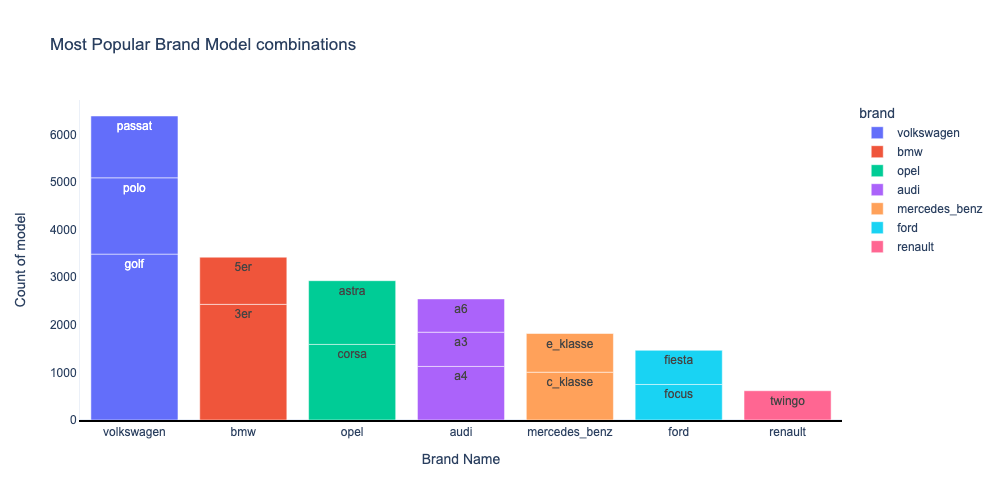

In [38]:
table = brand_model_grouped.sort_values(by='count', axis=0, ascending=False).head(15)

print(tabulate(table, headers='keys', tablefmt='psql'))

fig = px.bar(table, x='brand', y='count', color='brand', text='model',
             title= 'Most Popular Brand Model combinations')

fig.update_xaxes(title='Brand Name', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title='Count of model',showgrid=False, showline=True)
fig.update_layout(font_size = 12, template='plotly_white', font_family='Arial')
fig.show('png', width=1000)

#### Observations
- **_We'd immediately notice the agreement of this pattern with what we observed in the brands. Volkswagen, Opel, BMW, Mercedes Benz, Audi, Ford, and Renaut remain the top brands:_**
    - *The most popular Volkswagen models are the Golf, Polo and Passat.*
    - *The most popular BMW models are the 3er and 5er series.*
    - *The most popular Opel models are Corsa and Astra.*
    - *Audi is popular with their A-series models (a4, a3 and a6)*
    - *Mercedes is popular with the c and e class cars*
    - *Ford is popular with its focus and fiesta models while the most popular Renault model is the Twingo*
    
## Does Mileage Influence Price?

Let's explore how odometer readings influence the average price of a listed car. We will divide our odometer readings into intervals then inspect for any interesting price patterns as mileage increases. Let's examine the unique values in `odometer_km`:

In [39]:
sorted(autos['odometer_km'].unique())

[5000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 125000,
 150000]

There are not many unique values in this column, and it appears that the data in this column are round to the nearest thousands. We can split our odometer readings into seven intervals as follows:

```
5000km - 10000km
20000km - 30000km
40000km - 50000km
60000km - 70000km
80000km - 90000km
100000km - 125000km
150000km or more
```

These intervals are few and easy to work with, so we will create a dictionary to hold them:

In [40]:
odometer_groups = {
    5000:'5000km - 10000km',
    10000:'5000km - 10000km',
    20000:'20000km - 30000km',
    30000:'20000km - 30000km',
    40000:'40000km - 50000km',
    50000:'40000km - 50000km',
    60000:'60000km - 70000km',
    70000:'60000km - 70000km',
    80000:'80000km - 90000km',
    90000:'80000km - 90000km',
    100000:'100000km - 125000km',
    125000:'100000km - 125000km',
    150000:'150000km or more'
}

Let's extract the relevant columnns (`odometer_km` and `usd_price`) into a new variable called *`mileage`*. 

Next, we can map the values from the `odometer_groups` dictionary into `odometer_km` column. We can use our handy `translate_column()` function to achieve this.

In [41]:
# extract relevant columns
mileage = autos[['odometer_km', 'usd_price']]

translate_column(mileage,'odometer_km',odometer_groups)
mileage.head()

,odometer_km,usd_price
0,150000km or more,5000
1,150000km or more,8500
2,60000km - 70000km,8990
3,60000km - 70000km,4350
4,150000km or more,1350


Our odometer groups have been successfully mapped to the `odometer_km`. Let's use the `groupby()` method to compute the average price in each mileage group:

+----+---------------------+-----------------+
|    | odometer_km         |   avg_price_usd |
|----+---------------------+-----------------|
|  3 | 40000km - 50000km   |            8109 |
|  2 | 20000km - 30000km   |            7861 |
|  5 | 60000km - 70000km   |            7148 |
|  6 | 80000km - 90000km   |            6224 |
|  0 | 100000km - 125000km |            5068 |
|  4 | 5000km - 10000km    |            3592 |
|  1 | 150000km or more    |            3298 |
+----+---------------------+-----------------+


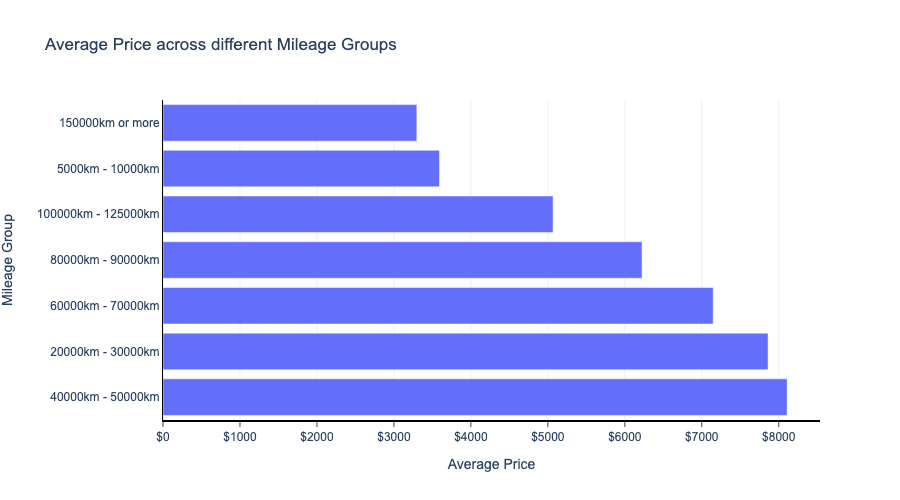

In [42]:
price_by_mileage =(mileage.groupby('odometer_km')['usd_price'].mean()
                       .reset_index(name='avg_price_usd')
                       .sort_values(by='avg_price_usd', axis=0, ascending=False)
                  )

price_by_mileage['avg_price_usd'] = price_by_mileage['avg_price_usd'].round()

# pretty-print price by mileage
print(tabulate(price_by_mileage, headers='keys', tablefmt='psql'))

# visualize findings
fig = px.bar(price_by_mileage, y='odometer_km',
             x='avg_price_usd', orientation='h',
             template='plotly_white', title='Average Price across different Mileage Groups')

fig.update_xaxes(title='Average Price', showline=True, linewidth=2, linecolor='black', 
                 ticks='outside', tickprefix='$')
fig.update_yaxes(title='Mileage Group',showgrid=False, showline=True, linewidth=1, linecolor='black')
fig.update_layout(font_size = 12, font_family='Arial')
fig.show('png', width=900)

#### Observation

- ***The relationship between price and mileage is not as easily predictable as expected. One would expect higher mileage cars to be priced lower, but our data shows that:***

    - *Medium mileage cars are the most expensive on average. This comprises vehicles that have travelled between 20,000 - 50,000km. Their average prices range between 7,861USD to 8,100USD*
    - *Moderate to High mileage cars (60,000 - 120,000km) follow behind, with average prices ranging from about 5,000 USD to 7,100 USD*
    - *As expected, the highest mileage cars (150,000km or more) are priced the least.* 
    - *We observe some unexpected findings with the lowest mileage cars (5000km to 10000km). Though one would expect these cars to be priced the highest, they are priced far lower than expected. It is hard to tell what could have caused this for sure, but this group could comprise cars that got damaged shortly after their purchase.*
    
- ***Could there be a lurking variable somewhere?***

## Price and Unrepaired Damage

We had suggested that the drop in average price of the low mileage cars may be due to some cars that damaged shortly after their purchase. Next, we will find out if damaged cars are cheaper, especially when compared to their non-damaged counterparts. 

Before we proceed, let's take another look at the `unrepaired_damage` column:

In [43]:
print('COUNTS')
print('-'*30)
print(autos['unrepaired_damage'].value_counts(dropna=False))
print("")
print('PERCENTAGES')
print('-'*30)
print(autos['unrepaired_damage'].value_counts(dropna=False, normalize=True))

COUNTS
------------------------------
no     30361
NaN     8112
yes     4486
Name: unrepaired_damage, dtype: int64

PERCENTAGES
------------------------------
no     0.706744
NaN    0.188831
yes    0.104425
Name: unrepaired_damage, dtype: float64


#### Observation

- *A huge percentage of cars (about 70%) in our dataset are in good condition. 10% of the car listings have unrepaired damages and we lack enough information on the status of the remaining 19%. The null values in this group will not be useful for our analysis.*

We can create our working dataframe from the `usd_price` and `unrepaired_damage` columns, then drop the rows with null values:

In [44]:
# Assign relevant columns to a new variable
price_damage_table = autos[['usd_price','unrepaired_damage']]
print(price_damage_table.shape)

# Drop null values from unrepaired damage
price_damage_table.dropna(axis=0, inplace=True)

# verify if the exact number of rows are dropped
print('Remaining rows: {}'.format(price_damage_table.shape[0])) 
price_damage_table.head(5)

(42959, 2)
Remaining rows: 34847


,usd_price,unrepaired_damage
0,5000,no
1,8500,no
2,8990,no
3,4350,no
4,1350,no


Next we will group by `unrepaired_damage` while computing the average USD prices for both the 'yes' and 'no' categories:

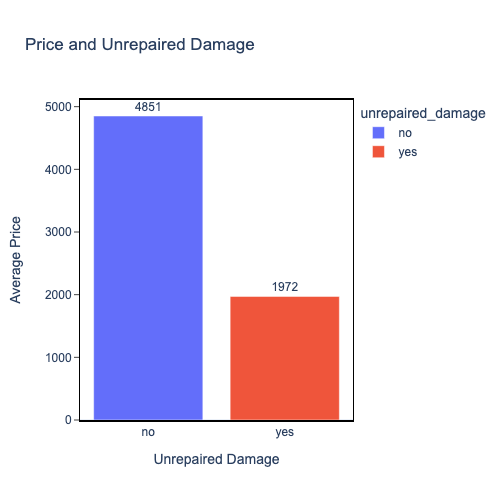

In [45]:
price_to_damage = (price_damage_table.groupby('unrepaired_damage')['usd_price'].mean()
                      .reset_index(name='avg_price_usd')
                  )
price_to_damage['avg_price_usd'] = price_to_damage['avg_price_usd'].round()
price_to_damage

fig = px.bar(price_to_damage, x='unrepaired_damage', y='avg_price_usd', color='unrepaired_damage', 
             text='avg_price_usd',
             title= 'Price and Unrepaired Damage')

fig.update_xaxes(title='Unrepaired Damage', showgrid=False, showline=True, linewidth=2, 
                 linecolor='black', mirror=True)
fig.update_yaxes(title='Average Price',showgrid=False, showline=True, ticks='outside',
                linecolor='black', mirror=True)
fig.update_traces(textposition='outside')
fig.update_layout(font_size = 12, font_family='Arial', template='plotly_white', width=500, height=500)
fig.show('png')

#### Observation

- *There is a huge variation in price between this two groups. We can safely say that, on average, cars in good condition are **2.5 times** more expensive than those with unrepaired damages.*

Now that we have established that unrepaired damage has a significant effect on price, we can go further to explore the reason for the **shocking low prices observed for the lowest mileage cars (5,000 - 10,000km)**.

## Were the Lowest Mileage Cars Affected By Some Sort of Early Damage?

To conduct this investigation, we need two columns from our cleaned Dataframe (`odometer_km` and `unrepaired_damage`). We will perform our analysis in four steps:

1. We will collect the two columns into a seperate dataframe.
2. We will use the `translate_column` function to map odometer_km to the respective mileage intervals.
3. We will remove the null values from unrepaired damage and map the column to dummy variables: 1 for 'yes', 0 for 'no'.
4. Finally, we will use the `.groupby()` method to compute the damaged cars ratio. This ratio represents the weight of unrepaired_damage to the number of cars in each mileage interval (we can do this by calculating the mean unrepaired damage).

Lets take this steps one after the other:

#### 1. Collect the required columns into a seperate dataframe

In [46]:
working_df = autos[['odometer_km', 'unrepaired_damage']]

#### 2. Map the Odometer column to the respective mileage intervals

In [47]:
translate_column(working_df,'odometer_km',odometer_groups)

#### 3. Remove the null values from unrepaired damage and map the column to dummy variables 1 and 0

In [48]:
working_df.dropna(axis=0, inplace=True)

translate_column(working_df,'unrepaired_damage',{'yes':1,'no':0})

#### 4. Compute the average value of unrepaired_damage to number of cars in each mileage interval

In [49]:
grouped_df = (working_df.groupby('odometer_km')['unrepaired_damage'].mean()
                 .reset_index(name='dmg_cars_ratio')
             )

grouped_df['dmg_cars_ratio'] = grouped_df['dmg_cars_ratio'].round(3)
grouped_df.sort_values(by='dmg_cars_ratio', ascending=False, axis=0, inplace=True)
grouped_df

,odometer_km,dmg_cars_ratio
4,5000km - 10000km,0.212
1,150000km or more,0.150
0,100000km - 125000km,0.095
6,80000km - 90000km,0.081
5,60000km - 70000km,0.068
2,20000km - 30000km,0.062
3,40000km - 50000km,0.053


There are some insights in the table above. However, before making further observations, we will merge our `avg_price_usd` from the previous `price_by_mileage` dataframe into our new dataframe, then visualize for a more robust picture:

+----+---------------------+------------------+-----------------+
|    | odometer_km         |   dmg_cars_ratio |   avg_price_usd |
|----+---------------------+------------------+-----------------|
|  4 | 5000km - 10000km    |            0.212 |            3592 |
|  1 | 150000km or more    |            0.15  |            3298 |
|  0 | 100000km - 125000km |            0.095 |            5068 |
|  6 | 80000km - 90000km   |            0.081 |            6224 |
|  5 | 60000km - 70000km   |            0.068 |            7148 |
|  2 | 20000km - 30000km   |            0.062 |            7861 |
|  3 | 40000km - 50000km   |            0.053 |            8109 |
+----+---------------------+------------------+-----------------+


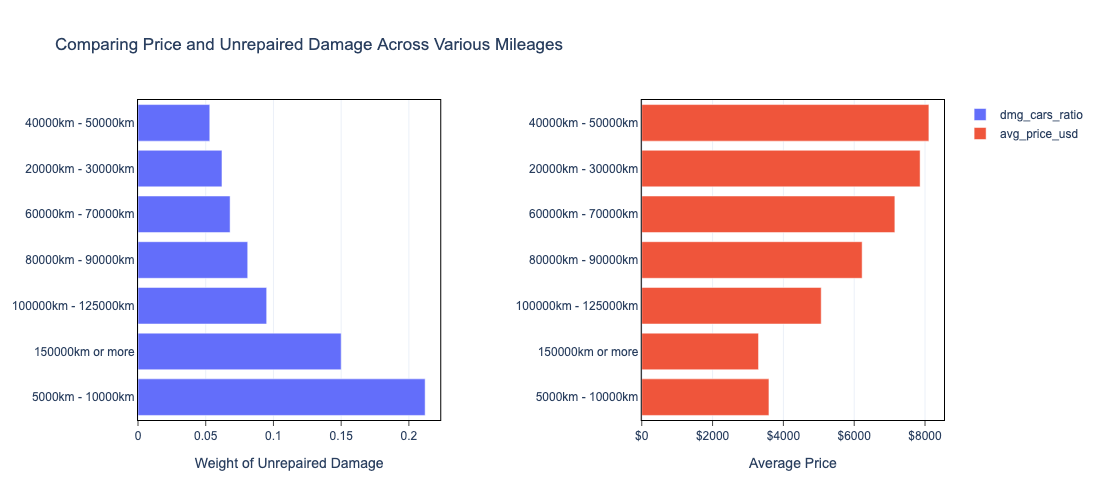

In [50]:
grouped_df['avg_price_usd'] = price_by_mileage['avg_price_usd']

# pretty print the dataframe
print(tabulate(grouped_df, headers='keys', tablefmt='psql'))


# Create visuals
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.25)

fig.add_trace((go.Bar(y=grouped_df['odometer_km'], x=grouped_df['dmg_cars_ratio'], orientation='h',
                      name='dmg_cars_ratio'
                     )
              ), row=1, col=1)

fig.add_trace((go.Bar(y=grouped_df['odometer_km'], x=grouped_df['avg_price_usd'], orientation='h',
                      name='avg_price_usd'
                     )
              ), row=1, col=2)

fig.update_layout(template = 'plotly_white', 
                  title_text= 'Comparing Price and Unrepaired Damage Across Various Mileages',
                 height=500, font_size = 12, font_family='Arial')

fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(tickprefix='$',row=1, col=2, title='Average Price')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True, ticks='outside')
fig.update_xaxes(row=1, col=1, title='Weight of Unrepaired Damage')
fig.show('png', width=1100)

#### Observations

- *The price trend we noticed before can be better explained when considering unrepaired damage. Here we see the best-priced cars having the lowest weight of unrepaired damage, while the poorly priced vehicles have a higher occurrence of damages within their group.*
- *It is evident that the **prices for the low mileage cars were affected by the significant cases of unrepaired damage within the group (a weight of 0.21)**. This further confirms our suspicions that some of the low mileage vehicles were new vehicles that may have been damaged within a short duration of purchase.*
- *We had expected newer vehicles to have lesser mileages and better prices overall. However, it appears that the prescence or absence of unrepaired damage may be a better determinant of price.*
- *Prices drop, as unrepaired damage increases (inverse correlation). This can even occur irrespective of how impressive a car's mileage is.*


## Creating Value Metric

Since we know a few variables that can influence price. We will attempt to create a metric that could help us analyse the price-value ratio for all the listed cars. We will consider the following as determinants in our ratio:

- The price of the car.

- Mileage.

- The presence or absence of an unrepaired damage.

## 1. Price To Mileage Ratio

First we will create a price to mileage ratio by dividing our `usd_price` by the mileage (`odometer_km`). The unit for this ratio will be USD/km travelled. Let's consider an example below: 

In [51]:
# car A is priced at 5,000 USD but has travelled 10,000km
car_a_price = 5000
car_a_mileage = 10000

# car B is priced at 5,000 USD but has travelled 150,000km
car_b_price = 5000
car_b_mileage = 150000

# compute both car's price to mileage ratio
pm_ratio_car_a = car_a_price/car_a_mileage
pm_ratio_car_b = car_b_price/car_b_mileage

print('The price/mileage ratio of car A is : {:.2f}'.format(pm_ratio_car_a))
print('The price/mileage ratio of car B is : {:.2f}'.format(pm_ratio_car_b))

The price/mileage ratio of car A is : 0.50
The price/mileage ratio of car B is : 0.03


The output above illustrates the benefits of this ratio. Even when we set cars A and B at the same price, car A offers more value than car B because it has considerably covered less distance.

When considering price to mileage ratio, we should be mindful that cars with extremely high prices can appear to have better ratios than cheaper cars. For example, a car that costs 1,000,000USD and has a mileage of 150,000km may appear to hold a better value than a similar car that is priced at 10,000USD with the same mileage. The following code block illustrates this detail:

In [52]:
print('Expensive Car(price: 1,000,000USD, mileage:150,000km) - price/mileage: {:.2f}'.format(1000000/150000))
print('Cheaper Car(price: 100,000USD, mileage:150,000km) - price/mileage: {:.2f}'.format(100000/150000))

Expensive Car(price: 1,000,000USD, mileage:150,000km) - price/mileage: 6.67
Cheaper Car(price: 100,000USD, mileage:150,000km) - price/mileage: 0.67


These extremely high prices will not affect our analysis, considering that we already cleaned our data to contain more acceptable price ranges. Recall, during the cleaning phase, we set our maximum price at 16,350USD!

In [53]:
# Review price range from our cleaned dataset
autos[['odometer_km', 'usd_price']].describe()

,odometer_km,usd_price
count,42959.000000,42959.000000
mean,129684.582974,4129.176680
std,36385.094333,3863.748169
min,5000.000000,1.000000
25%,125000.000000,1150.000000
50%,150000.000000,2750.000000
75%,150000.000000,6000.000000
max,150000.000000,16350.000000


Lets create a new dataframe where we will store our price to mileage ratio. This dataframe will contain the following columns from our **`autos`** dataset: `brand`, `model`, `odometer_km`, `unrepaired_damage` and `usd_price`.

In [54]:
price_value_df = autos[['brand','model','odometer_km','unrepaired_damage','usd_price']]
price_value_df.head()

,brand,model,odometer_km,unrepaired_damage,usd_price
0,peugeot,andere,150000,no,5000
1,bmw,7er,150000,no,8500
2,volkswagen,golf,70000,no,8990
3,smart,fortwo,70000,no,4350
4,ford,focus,150000,no,1350


Next, let's compute the `price_damage` ratio for each record, then assign the values to a new column called `pm_ratio`:

In [55]:
price_value_df['pm_ratio'] = price_value_df['usd_price']/price_value_df['odometer_km']
price_value_df.head()

,brand,model,odometer_km,unrepaired_damage,usd_price,pm_ratio
0,peugeot,andere,150000,no,5000,0.033333
1,bmw,7er,150000,no,8500,0.056667
2,volkswagen,golf,70000,no,8990,0.128429
3,smart,fortwo,70000,no,4350,0.062143
4,ford,focus,150000,no,1350,0.009000


## 2. Accounting for Unrepaired Damage

Our value metric will be incomplete without accounting for unrepaired damage. If a car has some unrepaired damage, we will **halve** its price to mileage ratio (*The decision to halve these values is majorly subjective. One may come up with a much better way to account for unrepaired damage than I have done in this project*).

Lets apply this updated measure to our dataframe:

In [56]:
price_value_df.dropna(axis=0, inplace=True) # drop rows with NaN values

# Boolean indexing to select listings with unrepaired damage
selector = price_value_df['unrepaired_damage']=='yes'

# Copy pm ratio to a new column
price_value_df['corrected_ratio'] = price_value_df['pm_ratio']

# Halve the corrected ratio if unrepaired damage is 'yes'
price_value_df.loc[selector, 'corrected_ratio'] = price_value_df.loc[selector, 'corrected_ratio']*0.5

# Examine the records with unrepaired damage
price_value_df[selector].head(3)

,brand,model,odometer_km,unrepaired_damage,usd_price,pm_ratio,corrected_ratio
28,mini,cooper,150000,yes,5250,0.035000,0.017500
30,peugeot,2_reihe,150000,yes,80,0.000533,0.000267
51,mercedes_benz,s_klasse,150000,yes,6000,0.040000,0.020000


In [57]:
# Examine the records with without unrepaired damage
price_value_df[~(selector)].head(3)

,brand,model,odometer_km,unrepaired_damage,usd_price,pm_ratio,corrected_ratio
0,peugeot,andere,150000,no,5000,0.033333,0.033333
1,bmw,7er,150000,no,8500,0.056667,0.056667
2,volkswagen,golf,70000,no,8990,0.128429,0.128429


#### Observations

- *Our code worked as intended. The price to mileage ratio for listings with unrepaired damage have been halved while listings without unrepaired damage were left unaffected.*

A metric is usually more beneficial when set at a defined range of values. **_Our corrected metric needs one more adjustment_**: We need to develop a 'normalized' or 'refrence' range where we expect our ratios to fall:

In [58]:
price_value_df[['corrected_ratio']].describe()

,corrected_ratio
count,33664.000000
mean,0.055055
std,0.138390
min,0.000003
25%,0.009000
50%,0.022667
75%,0.056000
max,3.190000


We can see that our lowest price_value ratio is approximately zero while the highest is about 3. With the knowledge our minimum and maximum values, We can scale these values between `0` and `10` as the value for money paid - where `10` represents complete value for money and `0` represents no value for money at all.

## 3. Scaling Price to Value ratio into a Defined Range

Let's say we want to scale a range of values min to max **`[min..max]`** into a defined range A to B **`[A..B]`**.

```
   Any value 'x' between min and max can be scaled into the range [A..B] as follows:
               
                                         (B - A) (x - min)
       Value of x in range [A..B] =    -------------------  + A
                                             max - min                                            
```
Since our range `[A...B]` is `[0..10]`, our formula becomes:

```
                                         (10 - 0) (x - min)
       Value of x in range [0..10] =    -------------------  + 0
                                             max - min                                        
```

Our corrected ratio represented by `x` in the formula above. Hence:

```                                         
                                                     10(x - min)
       corrected ratio(x) in range [0..10] =    ------------------- 
                                                   max_ratio - min_ratio                                                                                      
```

Let's use this formula to scale our price value ratio between `0` and `10`. We will call this the potiential `Value_earned` from a purchase:

In [59]:
# Extracting our min and max corrected_ratios
max_ratio = (price_value_df['corrected_ratio']
                 .sort_values(ascending=False)
                 .iloc[0]
            )

min_ratio = (price_value_df['corrected_ratio']
                 .sort_values()
                 .iloc[0]
            )

# computing ratio difference i.e (max - min)
ratio_diff = max_ratio - min_ratio

# using previous formula to compute the value for money column
price_value_df['value_earned'] = ((10 * (price_value_df['corrected_ratio'] - min_ratio))/ratio_diff)

price_value_df['value_earned'] = price_value_df['value_earned'].round()

price_value_df.sort_values(by='value_earned', ascending=False).head()

,brand,model,odometer_km,unrepaired_damage,usd_price,pm_ratio,corrected_ratio,value_earned
22424,volkswagen,polo,5000,no,15950,3.19,3.19,10.0
39828,volkswagen,golf,5000,no,15800,3.16,3.16,10.0
24586,opel,andere,5000,no,14900,2.98,2.98,9.0
6921,hyundai,i_reihe,5000,no,15000,3.00,3.00,9.0
29145,bmw,5er,5000,no,14500,2.90,2.90,9.0


Now that we have created our value metric. Let's take a look at the different brands, with respect to value for money i.e potiential value earned from purchase.

## Best Value for Money Brands

Earlier we had compared the top brands based on Popularity and price. Now, we will use all the handy functions and methods we have used before to compare the various brands based on average value for money:

+----+-----------+-------------+
|    | brand     |   avg_value |
|----+-----------+-------------|
|  6 | dacia     |        0.48 |
| 21 | mini      |        0.27 |
| 31 | skoda     |        0.24 |
| 26 | porsche   |        0.22 |
|  3 | chevrolet |        0.21 |
| 12 | hyundai   |        0.21 |
| 36 | trabant   |        0.19 |
+----+-----------+-------------+


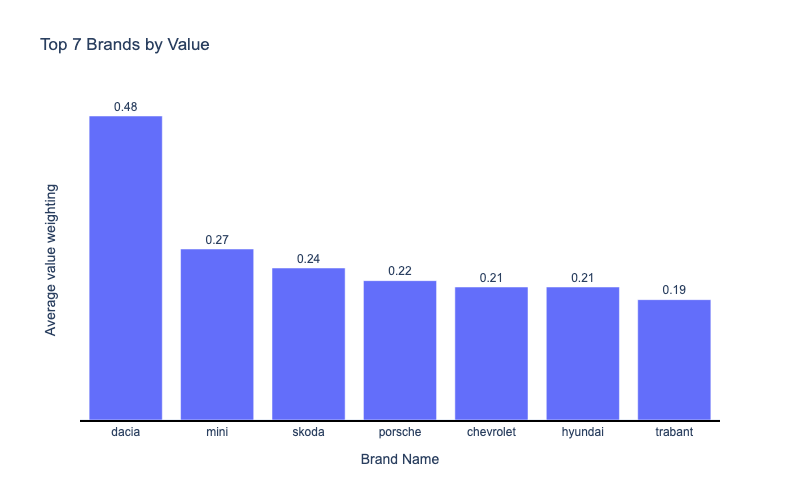

In [60]:
brands_by_value = (price_value_df[['brand', 'value_earned']]
                       .groupby('brand')['value_earned'].mean()
                       .round(2)
                       .reset_index(name='avg_value')
                       .sort_values(by='avg_value', ascending=False)
                  )

value_brands_7 = brands_by_value.head(7)
print(tabulate(value_brands_7, headers='keys', tablefmt='psql'))

# Build Visual
fig = px.bar(value_brands_7, x='brand', y='avg_value', template='plotly_white', 
             title='Top 7 Brands by Value', text='avg_value')

fig.update_xaxes(title='Brand Name', showgrid=False, linecolor='black', linewidth=2)
fig.update_yaxes(title='Average value weighting', showgrid=False, showticklabels=False)
fig.update_traces(textposition='outside')
fig.update_layout(font_size = 12, width=800, font_family='Arial')
fig.show('png')

#### Observations

- *Considering our newly-created value metric, which weighs the effect of price, mileage and unrepaired damage on a listed car, none of the seven most popular brands are top players in our value for money list.*
- *Darcia cars top the entire listings with a weighting of 0.48. The Mini brand follows behind (0.27)*. 
- *There might not be a huge difference in the value offered by Skoda, Porsche, Chevrolet and Hyundai Brands, since their value weightings are almost identical (around 0.23). Buyers can freely select any of these brands without missing out too much on the others.*
- *The top brands here may not be the most popular on the listings. However, they provide more value for price-conscious buyers. These buyers can obtain good deals, while they rest assured of the balance between quality and value.*

## Best Value for Money Models

Now that we have some information on the best value for money brands. We can drill-in to understand the best value for money models available on the listings.

Again, we will use a couple of handy methods and functions we used before:

+-----+------------+---------+-------------+
|     | brand      | model   |   avg_value |
|-----+------------+---------+-------------|
| 194 | porsche    | 911     |        1.5  |
| 224 | skoda      | citigo  |        1.45 |
|  51 | dacia      | lodgy   |        1.2  |
|  10 | audi       | a1      |        1.1  |
| 273 | volkswagen | up      |        1.09 |
|  76 | ford       | b_max   |        1    |
+-----+------------+---------+-------------+


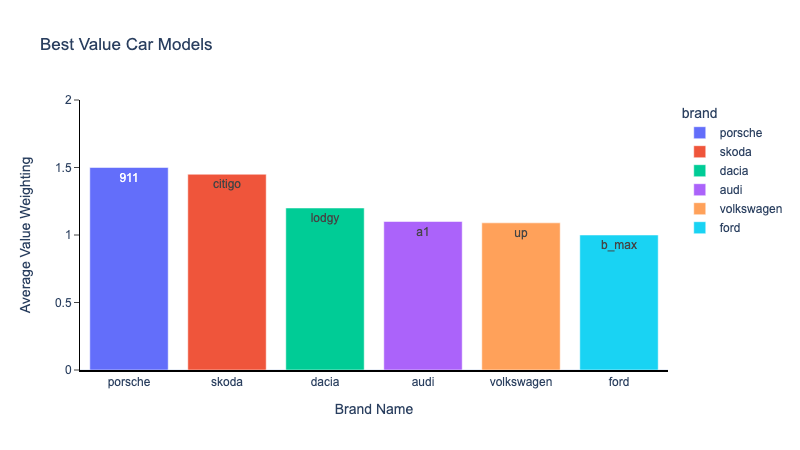

In [61]:
models_by_value = (price_value_df[['brand','model','value_earned']]
                       .groupby(['brand', 'model'])['value_earned'].mean()
                       .round(2)
                       .reset_index(name='avg_value')
                       .sort_values(by='avg_value', ascending=False)  
                  )

value_models_6 = models_by_value.head(6)

print(tabulate(value_models_6, headers='keys', tablefmt='psql'))

fig = px.bar(value_models_6, x='brand', y='avg_value', color='brand', text='model',
             title= 'Best Value Car Models', range_y=(0,2))

fig.update_xaxes(title='Brand Name', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title='Average Value Weighting',showgrid=False, showline=True, ticks='outside',
                linecolor='black')
fig.update_layout(font_size = 12, font_family='Arial', template='plotly_white', width=800, height=450)
fig.show('png', width=800)

#### Observations

- *The Porshe 911 has the best value weighting (1.50), while the Skoda Citigo (1.45) follows along. The Darcia dodgy (1.2) is ranked third.*
- *We see some of the most common brands again (Audi, Volkwagen and Opel). Buyers looking to enjoy the popularity of these brands, while also enjoying significant value benefits, could consider buying the Audi A1, the Volkswagen up models or the Ford b_max.*

## Recommendations for High Value Used Cars

Buyers should be strategic when considering used cars on eBay:

The first step is obvious. Search for a vehicle on the listings. Consider the brand (German brands are popular for a reason). If interested in a famous brand, check out the Volkswagen cars. They offer some interesting balance between popularity, mileage and price.

If a lower purchase price is the goal, buyers should carefully consider condition and mileage (they do not always correlate). Even vehicles with low mileage can undergo tremendous wear and tear, negatively impacting value. 

The best advice is to consider a value metric, which includes the vehicle price, its mileage, and its condition (taking unrepaired damage into account), before determining whether a car is worth the extra dollars.

## Conclusion

Our analysis of eBay Kleinanzeigen's listings showed the influence of price, mileage and unrepaired damage on a car's overall value. We identified the most popular cars on the website listings, examined the relationship between mileage and price, then explored the effects of unrepaired damage on a car's value. Finally, we created a value metric to help price-conscious buyers in their quest to identify the best value cars.

## Prompts for Future exploration

- Are certain vehicle types more expensive than others on average?
- Do vehicles with certain fuel types record more cases of unrepaired damage than the others?